In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from pyliso import plotTF, plotTFs
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9'] #5
lsList = ['-','--','-.',':']  #4

In [2]:
FSSPZTOutNoiseData = np.loadtxt('FSSPZTOutNoise_29-07-2019_095945.txt')
FSSEOMOutNoiseData = np.loadtxt('FSSEOMOutNoise_26-07-2019_184403.txt')
#North FSS TF Data
NFSSTest1toPZTTFLFData = np.loadtxt('NFSSTest1ToPZTOutTFLF_26-07-2019_162614.txt')
NFSSTest1toPZTTFHFData = np.loadtxt('NFSSTest1ToPZTOutTFHF_26-07-2019_171049.txt')
NFSSTest1toEOMTFLFData = np.loadtxt('NFSSTest1ToEOMOutTFLF_26-07-2019_155900.txt')
NFSSTest1toEOMTFHFData = np.loadtxt('NFSSTest1ToEOMOutTFHF_26-07-2019_161517.txt')
#South FSS TF Data
SFSSTest1toPZTTFLFData = np.loadtxt('SFSSTest1ToPZTOutTFLF_26-07-2019_172414.txt')
SFSSTest1toPZTTFHFData = np.loadtxt('SFSSTest1ToPZTOutTFHF_26-07-2019_174524.txt')
SFSSTest1toEOMTFLFData = np.loadtxt('SFSSTest1ToEOMOutTFLF_29-07-2019_120918.txt')
SFSSTest1toEOMTFMFData = np.loadtxt('SFSSTest1ToEOMOutTFMF_29-07-2019_120806.txt')
SFSSTest1toEOMTFHFData = np.loadtxt('SFSSTest1ToEOMOutTFHF_29-07-2019_123048.txt')

#Attenuators in NFSS EOM TF
# Had a 10 dB Attenuator at Ch2 during LF measurement
NFSSTest1toEOMTFLFData[:,1] = NFSSTest1toEOMTFLFData[:,1]*(10**(10/20))     
# Had a 10 dB Attenuator at Ch2 and 36 dB attenuator to the input of probe source (but not CH1)
# So the source signal was 36 dB lower than what was measured in Ch1 (Effectively Ch1 is 36dB amplified)
NFSSTest1toEOMTFHFData[:,1] = NFSSTest1toEOMTFHFData[:,1]*(10**(36/20))*(10**(10/20))


#Attenuators in SFSS EOM TF
# Had a 10 dB Attenuator at Ch2 during LF measurement (10Hz to 0.5 Hz)
SFSSTest1toEOMTFLFData[:,1] = SFSSTest1toEOMTFLFData[:,1]*(10**(10/20))     
# Had a 10 dB Attenuator at Ch2 and 12 dB attenuator to the input of probe source (but not CH1)
# So the source signal was 12 dB lower than what was measured in Ch1 (Effectively Ch1 is 36dB amplified)
# This is from 10Hz to 100 Hz
SFSSTest1toEOMTFMFData[:,1] = SFSSTest1toEOMTFMFData[:,1]*(10**(12/20))*(10**(10/20)) 
# Had a 10 dB Attenuator at Ch2 and 60 dB attenuator to the input of probe source (but not CH1)
# So the source signal was 36 dB lower than what was measured in Ch1 (Effectively Ch1 is 36dB amplified)
# This is from 100 Hz to 102.4kHz
SFSSTest1toEOMTFHFData[:,1] = SFSSTest1toEOMTFHFData[:,1]*(10**(60/20))*(10**(10/20))

#Stack TF measurements to create single arrays
NFSSTest1toPZTTF = np.vstack((NFSSTest1toPZTTFLFData,NFSSTest1toPZTTFHFData[1:,:]))
NFSSTest1toEOMTF = np.vstack((NFSSTest1toEOMTFLFData,NFSSTest1toEOMTFHFData[1:,:]))
SFSSTest1toPZTTF = np.vstack((SFSSTest1toPZTTFLFData,SFSSTest1toPZTTFHFData[1:,:]))
SFSSTest1toEOMTF = np.vstack((SFSSTest1toEOMTFLFData,SFSSTest1toEOMTFMFData[1:,:],SFSSTest1toEOMTFHFData[1:,:]))


In [3]:
ASDDict={}
ASDDict['North PZTout'] = FSSPZTOutNoiseData[:,:2]
ASDDict['South PZTout'] = np.delete(FSSPZTOutNoiseData, 1, axis=1)
ASDDict['North EOMout'] = FSSEOMOutNoiseData[:,:2]
ASDDict['South EOMout'] = np.delete(FSSEOMOutNoiseData, 1, axis=1)

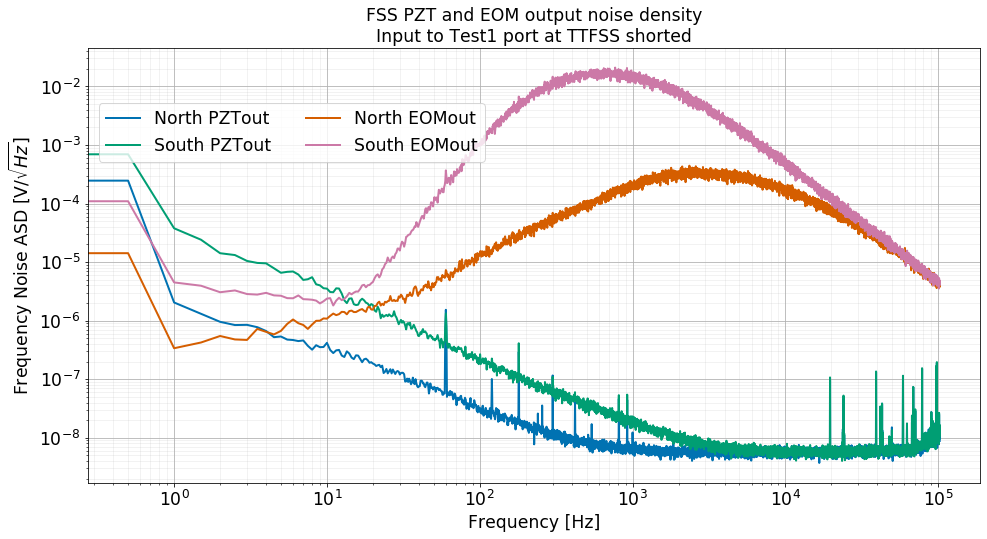

In [4]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,asd in ASDDict.items():
    plt.loglog(asd[:,0],asd[:,1],label=key,c=cList[ii%5],ls=lsList[int(ii/4)])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [V/$\sqrt{Hz}$]')
fig.gca().set_title('FSS PZT and EOM output noise density\nInput to Test1 port at TTFSS shorted')
fig.legend(loc=(0.1,0.7),ncol=2)
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

In [5]:
TFDict = {}
TFDict['NFSS Test1 to PZT Out'] = [NFSSTest1toPZTTF[:,0],NFSSTest1toPZTTF[:,1]*np.exp(1j*NFSSTest1toPZTTF[:,2]*np.pi/180)]
TFDict['NFSS Test1 to EOM Out'] = [NFSSTest1toEOMTF[:,0],NFSSTest1toEOMTF[:,1]*np.exp(1j*NFSSTest1toEOMTF[:,2]*np.pi/180)]
TFDict['SFSS Test1 to PZT Out'] = [SFSSTest1toPZTTF[:,0],SFSSTest1toPZTTF[:,1]*np.exp(1j*SFSSTest1toPZTTF[:,2]*np.pi/180)]
TFDict['SFSS Test1 to EOM Out'] = [SFSSTest1toEOMTF[:,0],SFSSTest1toEOMTF[:,1]*np.exp(1j*SFSSTest1toEOMTF[:,2]*np.pi/180)]
TFff = NFSSTest1toPZTTF[:,0]

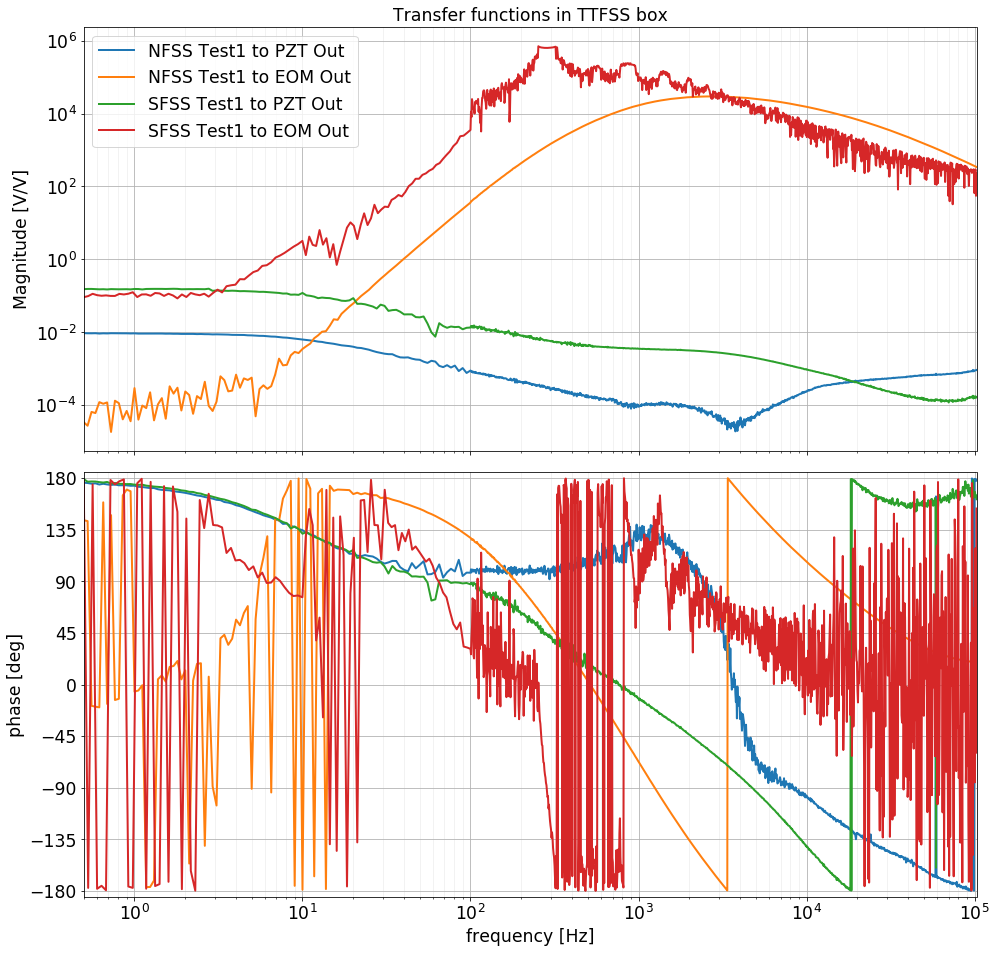

In [6]:
tfsMat = list(TFDict.items())
fig2 = plotTF(tfsMat[0][1][0], tfsMat[0][1][1],dB = False, label = tfsMat[0][0], figsize=[16,16])
mag_ax = fig2.axes[0]
phase_ax = fig2.axes[1]
for ii in range(1, len(tfsMat)):
    plotTF(tfsMat[ii][1][0], tfsMat[ii][1][1], mag_ax=mag_ax, phase_ax=phase_ax,dB=False,
           label=tfsMat[ii][0])
mag_ax.set_ylabel('Magnitude [V/V]')
mag_ax.set_title('Transfer functions in TTFSS box')
mag_ax.legend()
figlist += [fig2]

In [7]:
InpASDDict = {}
ASDff = ASDDict['North PZTout'][:,0]
InpASDDict['North PZTout'] = ASDDict['North PZTout'][:,1]/np.interp(ASDff,NFSSTest1toPZTTF[:,0],NFSSTest1toPZTTF[:,1])
InpASDDict['North EOMout'] = ASDDict['North EOMout'][:,1]/np.interp(ASDff,NFSSTest1toEOMTF[:,0],NFSSTest1toEOMTF[:,1])
InpASDDict['South PZTout'] = ASDDict['South PZTout'][:,1]/np.interp(ASDff,SFSSTest1toPZTTF[:,0],SFSSTest1toPZTTF[:,1])
InpASDDict['South EOMout'] = ASDDict['South EOMout'][:,1]/np.interp(ASDff,SFSSTest1toEOMTF[:,0],SFSSTest1toEOMTF[:,1])

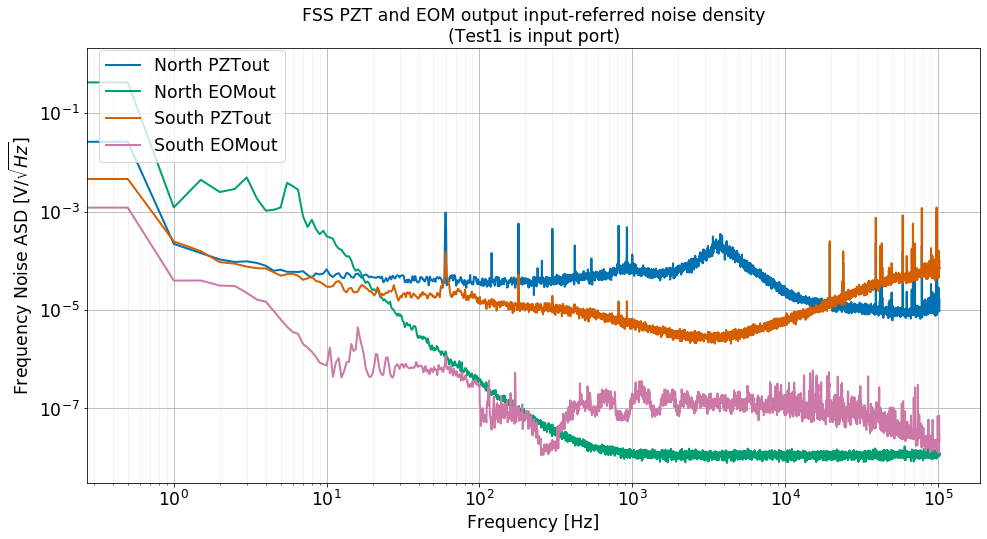

In [8]:
fig3 = plt.figure(figsize=[16,8])
ii=0
for key,asd in InpASDDict.items():
    plt.loglog(ASDff,asd,label=key,c=cList[ii])
    ii=ii+1
fig3.gca().set_xlabel('Frequency [Hz]')
fig3.gca().set_ylabel('Frequency Noise ASD [V/$\sqrt{Hz}$]')
fig3.gca().set_title('FSS PZT and EOM output input-referred noise density\n(Test1 is input port)')
fig3.legend(loc=(0.1,0.7))
fig3.gca().grid('on', which='both')
fig3.gca().grid(alpha=0.2, which='minor')
figlist += [fig3]

In [9]:
pp = PdfPages('FSSNoiseAndTFAnalysis.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()